In [1]:
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 7.3 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 

import sys 
sys.path.append('/home/aistudio/external-libraries')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

灰度直方图概括了图像的灰度级信息，简单的来说就是每个灰度级图像中的像素个数以及占有率，创建直方图无外乎两个步骤，统计直方图数据，再用绘图库绘制直方图。

统计直方图数据
 首先要稍微理解一些与函数相关的术语，方便理解其在python3库中的应用和处理
 BINS: 在上面的直方图当中，如果像素值是0到255，则需要256个值来显示直 方图。但是，如果不需要知道每个像素值的像素数目，只想知道两个像素值之间的像素点数目怎么办？例如，想知道像素值在0到15之间的像素点数目，然后是16到31。。。240到255。可以将256个值分成16份，每份计算综合。每个分成的小组就是一个BIN（箱）。在opencv中使用histSize表示BINS。
 DIMS: 数据的参数数目。当前例子当中，对收集到的数据只考虑灰度值，所以该值为1。
 RANGE: 灰度值范围，通常是[0,256]，也就是灰度所有的取值范围。
统计直方图同样有两种方法，使用opencv统计直方图，函数如下：


cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

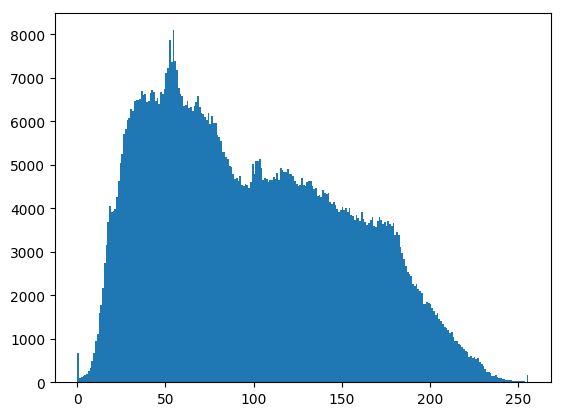

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('data/nezha.jpeg',1)
# img_np = np.array(img) 
plt.hist(img.reshape([-1]),256,[0,256]);
plt.show()

cv2.calcHist([images], [channels], mask, histSize, ranges[, hist[, accumulate ]])

* imaes:输入的图像
* channels:选择图像的通道
* mask:掩膜，是一个大小和image一样的np数组，其中把需要处理的部分指定为1，不需要处理的部分指定为0，一般设置为None，表示处理整幅图像
* histSize:使用多少个bin(柱子)，一般为256
* ranges:像素值的范围，一般为[0,255]表示0~255


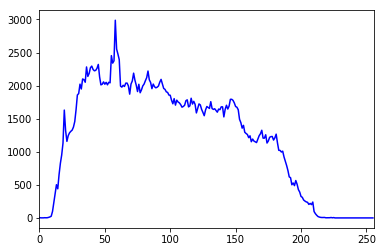

In [37]:
import cv2
# import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('data/nezha.jpeg',0)
histr = cv2.calcHist([img],[0],None,[256],[0,256]) #hist是一个shape为(256,1)的数组，表示0-255每个像素值对应的像素个数，下标即为相应的像素值
plt.plot(histr,color = 'b')
plt.xlim([0,256])
plt.show()

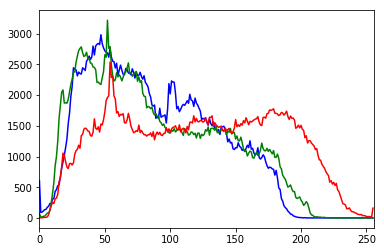

In [42]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('data/nezha.jpeg',1) 
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    #hist是一个shape为(256,1)的数组，表示0-255每个像素值对应的像素个数，下标即为相应的像素值
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

(442, 700)
309400


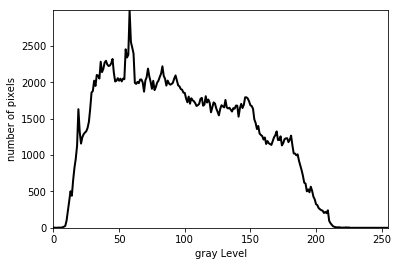

In [35]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

def main():
    img=cv2.imread('data/nezha.jpeg',0)
    #得到计算灰度直方图的值
    n = np.array(img)
    xy=xygray(img)   

    #画出灰度直方图
    x_range=range(256)
    plt.plot(x_range,xy,"r",linewidth=2,c='black')
    #设置坐标轴的范围
    y_maxValue=np.max(xy)
    plt.axis([0,255,0,y_maxValue])
    #设置坐标轴的标签
    plt.xlabel('gray Level')
    plt.ylabel("number of pixels")
    plt.show()

def xygray(img):
    #得到高和宽
    rows,cols=img.shape
    print(img.shape)
    #存储灰度直方图
    xy=np.zeros([256],np.uint64)
    for r in range(rows):
        for c in range(cols):
            xy[img[r][c]] += 1
    #返回一维ndarry
    print(xy.sum())
    return xy

main()